<a href="https://colab.research.google.com/github/SrihithaReddy13/twitter_sentiment_analysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Real time twitter tweet analysis


In [ ]:
API_KEY="usDrgQTcQCRzHK8M112mOgTgy"
API_SECRET_KEY="OghK6FXdWeqJ1VGB9M2t33drd0mngjUWQA4SHxU2URyVhFjDC6" 
BEARER_TOKEN="AAAAAAAAAAAAAAAAAAAAAISTJAEAAAAA7%2B8IrTo0tkbMr9nFY3c%2BofRYQOA%3DLtTILdWLun6tgEycvu3Zopse0gNvWT4BkI9Phu0Ij4i1T6sqUz"

In [ ]:
ACCESS_TOKEN_KEY="1315579201693515776-nVhdlXb92bF1TSOKvfgKGfNZStmw8c"
ACCESS_TOKEN_SECRET="cOmIOTomBcOkyBXmdLctzXhYTeyWrOhlumi65n5TDl8OS"

##IMPORT LIBRARIES AND DATASETS

In [ ]:
!pip install emoji

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import emoji

In [ ]:
import tweepy
import pandas as pd
import os

#Twitter Access
auth = tweepy.OAuthHandler( API_KEY,API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN_KEY,ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit = True)

msgs = []
msg =[]
query=input("Enter your keyword for search - ")
for tweet in tweepy.Cursor(api.search, q=query, rpp=100, lang='en').items(500):
    msg = [tweet.text, tweet.source, tweet.source_url] 
    msg = tuple(msg)                    
    msgs.append(msg)

tweets_df = pd.DataFrame(msgs)
tweets_df.head()


Enter your keyword for search - tokyo olympics


,0,1,2
0,RT @SavvyRinu: Let's get this right.\n\nSunday...,Twitter for Android,http://twitter.com/download/android
1,RT @Gurjant_Singh9: Feeling extremely proud an...,Twitter for iPhone,http://twitter.com/download/iphone
2,"RT @palba_c: .@peacockTV, whoever thought to p...",Twitter for iPhone,http://twitter.com/download/iphone
3,"RT @ColorOfChange: Yesterday, @Giveme1shot’s i...",Twitter for iPhone,http://twitter.com/download/iphone
4,Tokyo Olympics 50km race walk results: Event s...,WordPress.com,http://publicize.wp.com/


In [ ]:
tweets_df.rename(columns={0:'text',1:'device',2:'url'},inplace=True)

In [ ]:
tweets_df.describe()  #DOESNT MAKE SENSE

,text,device,url
count,500,500,500
unique,349,29,29
top,RT @SavvyRinu: Let's get this right.\n\nSunday...,Twitter for iPhone,http://twitter.com/download/iphone
freq,42,151,151


In [ ]:
tweets_df.drop_duplicates(subset=['text'],inplace=True)

In [ ]:
tweets_df.index=range(len(tweets_df.index))

In [ ]:
tweets_df['text']=tweets_df['text'].apply(lambda x: x.lower())

In [ ]:
tweets_df['demojized']=tweets_df['text'].apply(emoji.demojize)

In [ ]:
tweets_df

,text,device,url,demojized
0,rt @savvyrinu: let's get this right.\n\nsunday...,Twitter for Android,http://twitter.com/download/android,rt @savvyrinu: let's get this right.\n\nsunday...
1,rt @gurjant_singh9: feeling extremely proud an...,Twitter for iPhone,http://twitter.com/download/iphone,rt @gurjant_singh9: feeling extremely proud an...
2,"rt @palba_c: .@peacocktv, whoever thought to p...",Twitter for iPhone,http://twitter.com/download/iphone,"rt @palba_c: .@peacocktv, whoever thought to p..."
3,"rt @colorofchange: yesterday, @giveme1shot’s i...",Twitter for iPhone,http://twitter.com/download/iphone,"rt @colorofchange: yesterday, @giveme1shot’s i..."
4,tokyo olympics 50km race walk results: event s...,WordPress.com,http://publicize.wp.com/,tokyo olympics 50km race walk results: event s...
...,...,...,...,...
344,congrats to 🇺🇸 nathaniel coleman on taking sil...,Twitter for iPhone,http://twitter.com/download/iphone,congrats to :United_States: nathaniel coleman ...
345,rt @starsports: watch: canadian swimmers kayla...,Twitter for iPhone,http://twitter.com/download/iphone,rt @starsports: watch: canadian swimmers kayla...
346,"in india , athletes who win a medal at the #to...",Twitter Web App,https://mobile.twitter.com,"in india , athletes who win a medal at the #to..."
347,rt @stateprm: if you've been watching the #oly...,Twitter Web App,https://mobile.twitter.com,rt @stateprm: if you've been watching the #oly...


## TEXT VISUALISATION 

In [ ]:
sentences = tweets_df['demojized'].tolist()

In [ ]:
sentences_as_one_string = " ".join(sentences)

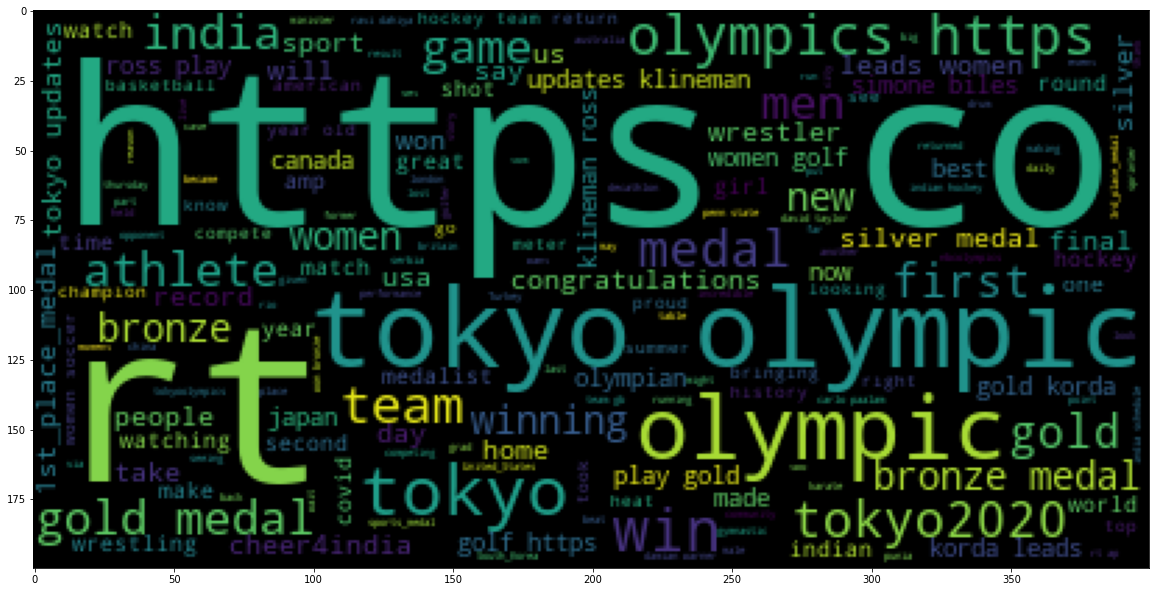

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

## CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [ ]:
import nltk
import string
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def message_cleaning(tweet):
    tweet = tweet.lower() # convert text to lower-case
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    tweet = [char for char in tweet if char not in string.punctuation]
    tweet = ''.join(tweet)
    tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
    return tweet

In [ ]:
tweets_df['clean'] = tweets_df['demojized'].apply(message_cleaning)

In [ ]:
print(tweets_df['clean'][5]) # show the cleaned up version

['rt', 'ATUSER', 'mijian', 'lopez', 'cuba', 'makes', 'history', 'and', 'becomes', 'the', 'first', 'male', 'wrestler', 'to', 'win', 'four', 'olympic', 'titles', '‘', '08', 'beijing', 'olympics', '1stplacemedal', '‘', '12', 'l…']


In [ ]:
print(tweets_df['text'][5]) # show the original version

rt @wrestling: mijian lopez 🇨🇺 makes history and becomes the first male wrestler to win four olympic titles.

‘08 beijing olympics 🥇 
‘12 l…


In [ ]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(' '.join(tweet)) 
        # set sentiment 
        return analysis.sentiment.polarity 

In [ ]:
tweets_df['sentiment']=tweets_df['clean'].apply(get_tweet_sentiment)

In [ ]:
tweets_df.head()

,text,device,url,demojized,clean,sentiment
0,rt @savvyrinu: let's get this right.\n\nsunday...,Twitter for Android,http://twitter.com/download/android,rt @savvyrinu: let's get this right.\n\nsunday...,"[rt, ATUSER, lets, get, this, right, sunday, d...",0.142857
1,rt @gurjant_singh9: feeling extremely proud an...,Twitter for iPhone,http://twitter.com/download/iphone,rt @gurjant_singh9: feeling extremely proud an...,"[rt, ATUSER, feeling, extremely, proud, and, e...",0.400000
2,"rt @palba_c: .@peacocktv, whoever thought to p...",Twitter for iPhone,http://twitter.com/download/iphone,"rt @palba_c: .@peacocktv, whoever thought to p...","[rt, ATUSER, ATUSER, whoever, thought, to, put...",0.000000
3,"rt @colorofchange: yesterday, @giveme1shot’s i...",Twitter for iPhone,http://twitter.com/download/iphone,"rt @colorofchange: yesterday, @giveme1shot’s i...","[rt, ATUSER, yesterday, ATUSER, inspiring, pod...",0.450000
4,tokyo olympics 50km race walk results: event s...,WordPress.com,http://publicize.wp.com/,tokyo olympics 50km race walk results: event s...,"[tokyo, olympics, 50km, race, walk, results, e...",0.000000


##Sentiment Analysis

In [ ]:
# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets_df.index if tweets_df['sentiment'][tweet]>0] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets_df.index))) 
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets_df.index if tweets_df['sentiment'][tweet]<0] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets_df.index))) 
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %".format(100*(len(tweets_df.index) -(len( ntweets )+len( ptweets)))/len(tweets_df.index))) 

Positive tweets percentage: 46.13180515759312 %
Negative tweets percentage: 12.320916905444125 %
Neutral tweets percentage: 41.54727793696275 %


In [ ]:

# printing first 5 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(tweets_df['text'][tweet]) 



Positive tweets:
rt @savvyrinu: let's get this right.

sunday dare took our athletes to tokyo without tests, kits, moral, made them lose deals, medals, care…
rt @gurjant_singh9: feeling extremely proud and emotional as i hold the bronze medal at the tokyo olympics. it is my honour &amp; privilege to…
rt @colorofchange: yesterday, @giveme1shot’s inspiring podium protest shed a light on the @iocmedia’s oppressive rule 50, which limits blac…
rt @wrestling: mijian lopez 🇨🇺 makes history and becomes the first male wrestler to win four olympic titles.

‘08 beijing olympics 🥇 
‘12 l…
#tbt: canadian women have been dominating at tokyo 2020, earning 15 of the 18 medals won by team canada thus far. t… https://t.co/eal4iamixh
rt @theavacantrell: tokyo takeoff tonight at 4pst @angelcitysports supporting usa paralympic team on #facebooklive go usa 🇺🇸 #olympics  #an…
rt @dadilicious2: former guy shows what a "patriot" he is by attacking the uswnt for winning a bronze medal instead of gold. 
https:

In [ ]:


# printing first 5 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweets_df['text'][tweet]) 
  



Negative tweets:
team usa men fail to advance in 4×100 relay at tokyo olympics and draw widespread criticism – cbs news https://t.co/7iyezvv31j
rt @bruce_arthur: again: the amount of surface disinfection at the tokyo olympics is wild. they wipe down almost everything.
rt @codygoodwin: olympic bronze medalist thomas gilman: "what do you do when someone punches you in the mouth and you fall down? you get ba…
rt @velonews: the 2021 olympics have been defined by a global discussion about athlete mental health. 

from their home in minnesota, kelly…
rt @usawp: #esp defeats #hun in the other women's #waterpolo semifinal. that sets up a 🥇 showdown between spain and team usa on saturday in…
podcast: so long tokyo! olympics round up - our recap of the second half of the tokyo programme, with a few added e… https://t.co/emquddhi1t
rt @usawp: the @teamusa women are headed to the gold medal game at #tokyo2020 

#usa defeats #roc 15-11 in a comeback effort. the squad cam…
rt @tiffkhsu: bob costas

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 8.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
def get_vader_sentiment(tweet): 
        return analyser.polarity_scores(' '.join(tweet))['compound']
        
           

In [ ]:
tweets_df['vaderScore']=tweets_df['clean'].apply(get_vader_sentiment)

In [ ]:
tweets_df.head()

,text,device,url,demojized,clean,sentiment,vaderScore
0,rt @savvyrinu: let's get this right.\n\nsunday...,Twitter for Android,http://twitter.com/download/android,rt @savvyrinu: let's get this right.\n\nsunday...,"[rt, ATUSER, lets, get, this, right, sunday, d...",0.142857,-0.4019
1,rt @gurjant_singh9: feeling extremely proud an...,Twitter for iPhone,http://twitter.com/download/iphone,rt @gurjant_singh9: feeling extremely proud an...,"[rt, ATUSER, feeling, extremely, proud, and, e...",0.400000,0.9332
2,"rt @palba_c: .@peacocktv, whoever thought to p...",Twitter for iPhone,http://twitter.com/download/iphone,"rt @palba_c: .@peacocktv, whoever thought to p...","[rt, ATUSER, ATUSER, whoever, thought, to, put...",0.000000,0.0000
3,"rt @colorofchange: yesterday, @giveme1shot’s i...",Twitter for iPhone,http://twitter.com/download/iphone,"rt @colorofchange: yesterday, @giveme1shot’s i...","[rt, ATUSER, yesterday, ATUSER, inspiring, pod...",0.450000,-0.2263
4,tokyo olympics 50km race walk results: event s...,WordPress.com,http://publicize.wp.com/,tokyo olympics 50km race walk results: event s...,"[tokyo, olympics, 50km, race, walk, results, e...",0.000000,0.3818


In [ ]:
def get_polarity(score):
  if score<0:
    return -1
  if score==0:
    return 0
  return 1

In [ ]:
tweets_df['polarity']=tweets_df['vaderScore'].apply(get_polarity)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


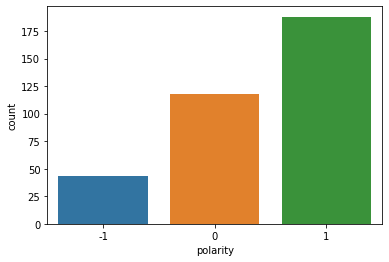

In [ ]:
import seaborn as sns
sns.countplot(tweets_df['polarity'])

##Hashtag analysis

In [ ]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        #print(i)
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
    # extracting hashtags from positive tweets
HT_positive = hashtag_extract(tweets_df['text'][tweets_df['polarity'] == 1])
    # extracting hashtags from negative tweets
HT_negative = hashtag_extract(tweets_df['text'][tweets_df['polarity'] == -1])# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

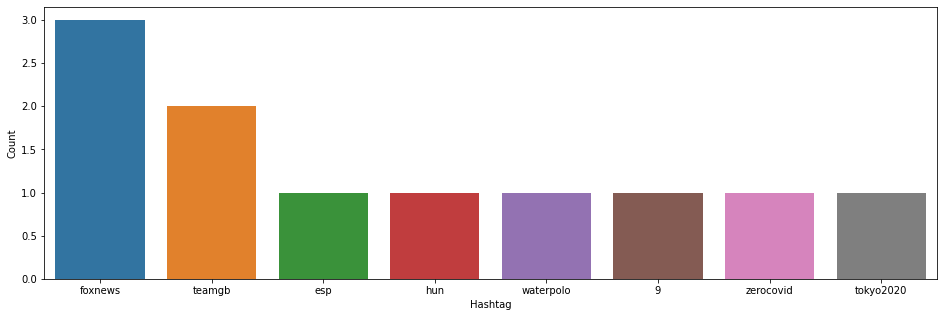

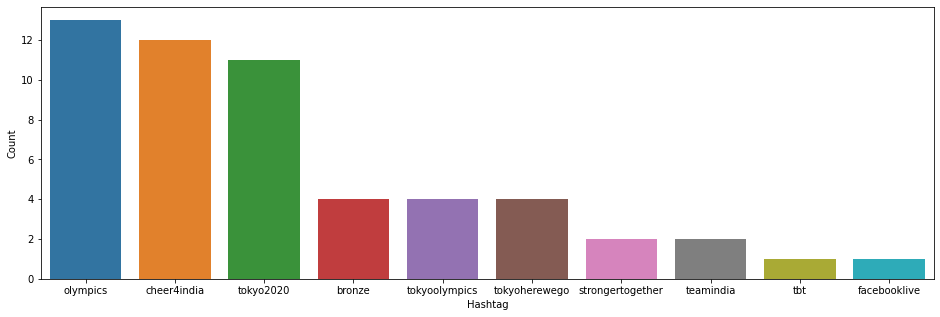

In [ ]:
b=nltk.FreqDist(HT_negative)
a=nltk.FreqDist(HT_positive)
e1=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e1=e1.nlargest(columns="Count",n=10)
e2=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
e2=e2.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e1,x="Hashtag",y="Count")
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e2,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

#**TSA With a Dataset**


In [ ]:
twitter_df=pd.read_csv('twitter.csv')

In [ ]:
twitter_df.head()

,id,Sentiment,TweetText
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


##EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


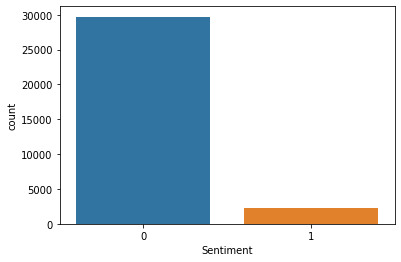

In [ ]:
sns.countplot(twitter_df.Sentiment)

##Word Cloud

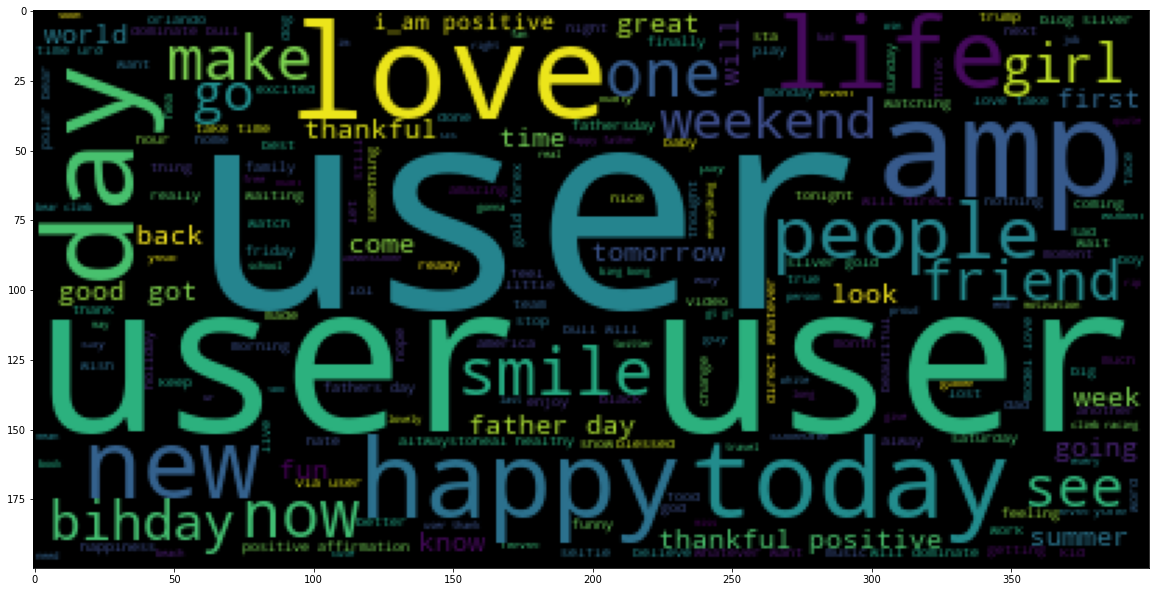

In [ ]:
from wordcloud import WordCloud
sentences = twitter_df['TweetText'].tolist()
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

##Hashtag Analysis

In [ ]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        #print(i)
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
    # extracting hashtags from positive tweets
HT_positive = hashtag_extract(twitter_df['TweetText'][twitter_df['Sentiment'] == 1])
    # extracting hashtags from negative tweets
HT_negative = hashtag_extract(twitter_df['TweetText'][twitter_df['Sentiment'] == 0])# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

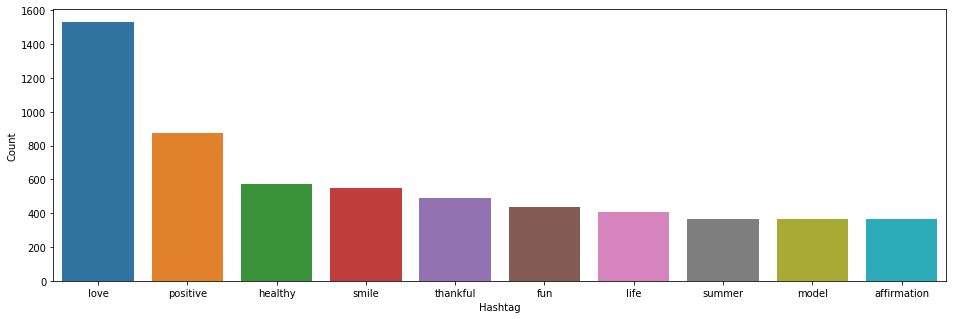

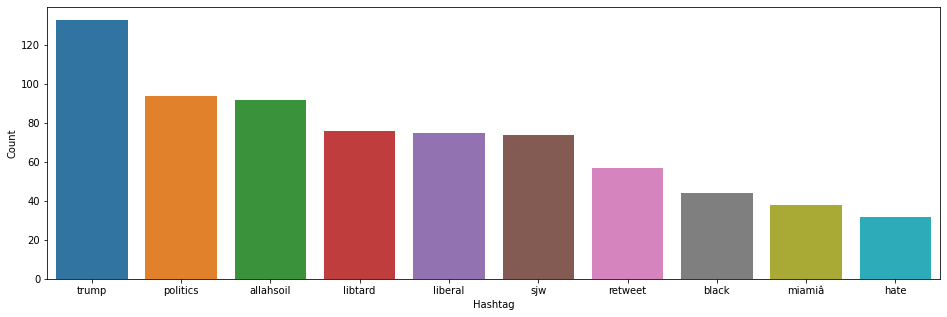

In [ ]:
b=nltk.FreqDist(HT_negative)
a=nltk.FreqDist(HT_positive)
e1=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e1=e1.nlargest(columns="Count",n=10)
e2=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
e2=e2.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e1,x="Hashtag",y="Count")
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e2,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

##Cleaning the dataset

In [ ]:
twitter_df.shape

(31962, 3)

In [ ]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Let's test the newly added function
tweets_df_clean = twitter_df['TweetText'].apply(message_cleaning)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning,dtype="uint8")
tweets_countvectorizer =vectorizer.fit_transform(twitter_df['TweetText'])

In [ ]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())
X = tweets

In [ ]:
y = twitter_df['Sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

##NAIVE BAYES CLASSIFIER USING A DATASET WITH LABELS

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_predict_test = NB_classifier.predict(X_test)

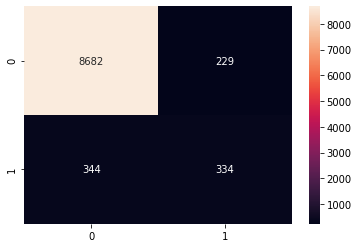

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True,fmt="d")

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      8911
           1       0.59      0.49      0.54       678

    accuracy                           0.94      9589
   macro avg       0.78      0.73      0.75      9589
weighted avg       0.94      0.94      0.94      9589



##LOGISTIC LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#takes a lot of time to run

In [ ]:
y_predict_test_llr=clf.predict(X_test)

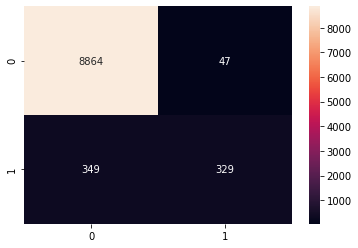

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict_test_llr)
sns.heatmap(cm, annot=True,fmt="d")

In [ ]:
print(classification_report(y_test, y_predict_test_llr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8911
           1       0.88      0.49      0.62       678

    accuracy                           0.96      9589
   macro avg       0.92      0.74      0.80      9589
weighted avg       0.96      0.96      0.95      9589

